In [ ]:
#outliers are the extreme values

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]

In [ ]:
salary

[11,
 40,
 45,
 68,
 65,
 68,
 78,
 90,
 57,
 74,
 91,
 92,
 88,
 68,
 57,
 48,
 99,
 101,
 68,
 77,
 110,
 140]

In [ ]:
# 5 points summary
#min, 25th percentile, 50th percentile, 75th percentile, max

In [ ]:
np.quantile(salary, [0, 0.25, 0.50, 0.75, 1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 140.  ])

In [ ]:
df = pd.DataFrame(salary, columns = ['Salary'])

In [ ]:
df

,Salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [ ]:
df.describe()

,Salary
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


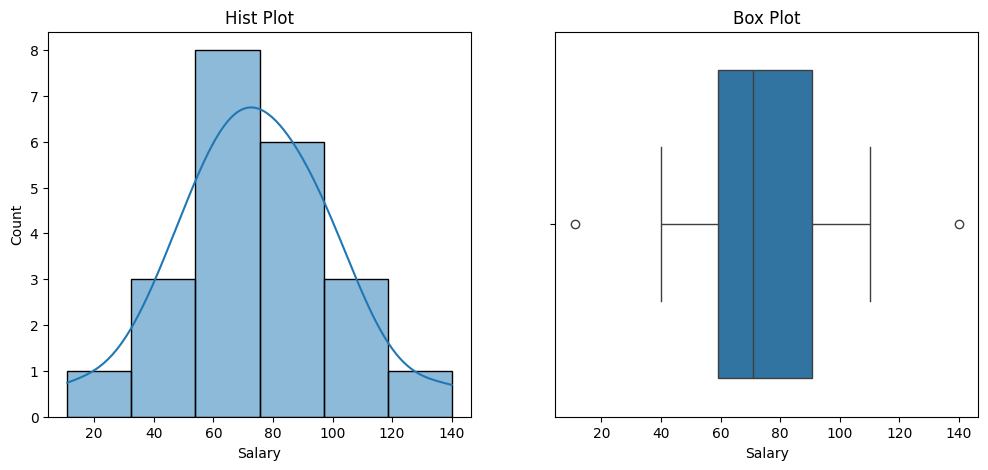

In [ ]:
#To check outliers we have distplot and boxplot

plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title('Hist Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'Salary')
plt.title('Box Plot')
plt.show()

In [ ]:
#here the distribution is not skewed because the outliers are present on both the sides
#In box plot we can see there are outliers

#dropping the outlier

#replace with mean and median

#capping the outlier

In [ ]:
#dropping the outlier

In [ ]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)

In [ ]:
lower_fence

11.375

In [ ]:
upper_fence

138.375

In [ ]:
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [ ]:
df_filtered

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [ ]:
df.shape

(22, 1)

In [ ]:
df_filtered.shape

(20, 1)

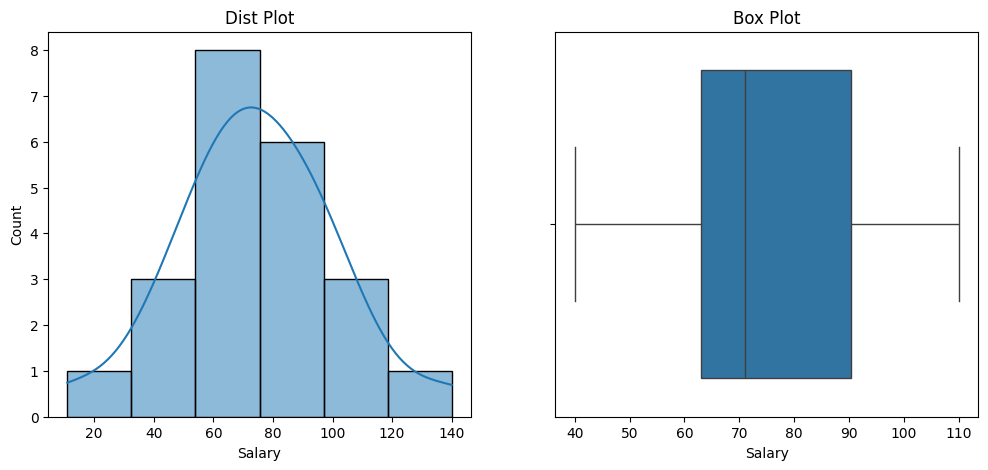

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary'], kde = True)
plt.title('Dist Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data = df_filtered, x = 'Salary')
plt.title('Box Plot')
plt.show()

In [ ]:
#imputation with mean
df['Salary_imputed_mean'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])

In [ ]:
df

,Salary,Salary_imputed_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


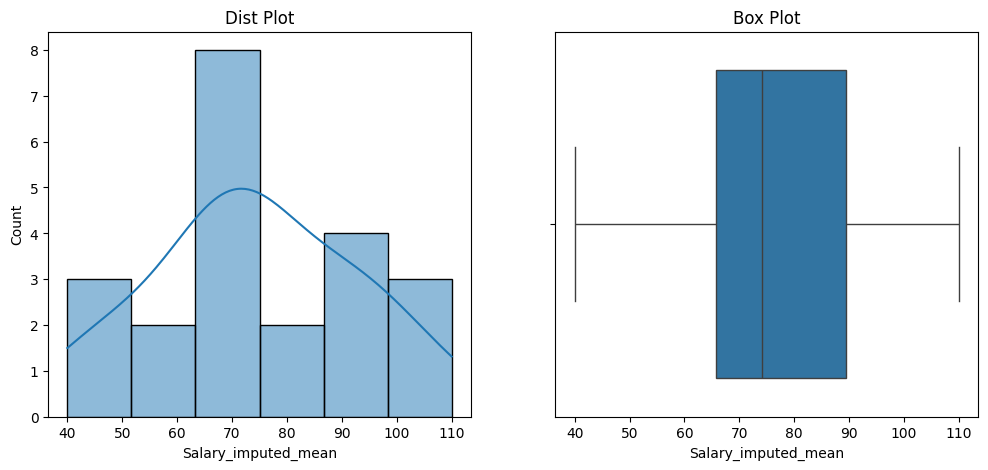

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_imputed_mean'], kde = True)
plt.title('Dist Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'Salary_imputed_mean')
plt.title('Box Plot')
plt.show()

In [ ]:
#imputation with median
df['Salary_imputed_median'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].median(), df['Salary'])

In [ ]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


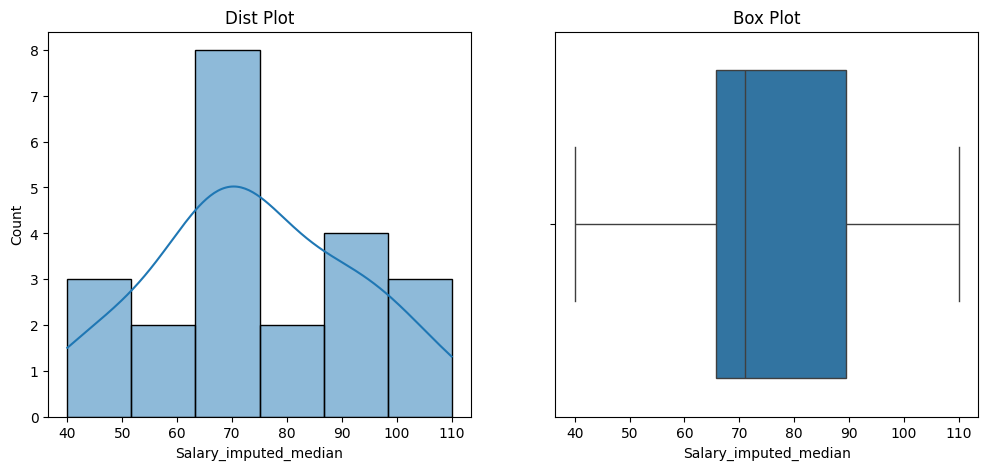

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_imputed_median'], kde = True)
plt.title('Dist Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'Salary_imputed_median')
plt.title('Box Plot')
plt.show()

In [ ]:
#capping >> replacing the nearest value which is not an outlier
df

,Salary,Salary_imputed_mean,Salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [ ]:
lower_cap = df['Salary'].quantile(0.05) #lower cap is 5th percentile
upper_cap = df['Salary'].quantile(0.95) #upper cap is 95th percentile

In [ ]:
lower_cap

40.25

In [ ]:
upper_cap

109.55

In [ ]:
#replace outliers with cap
#where(condition, [x, y], /)
#Return elements chosen from `x` and `y` depending on `condition`
#if df['Salary'] < lowe_cap satisfied then lower_cap and df['Salary'] > upper_cap satisfied then upper_cap
#otherwise keep salary as it is
df["Salary_capped"] = np.where(df['Salary'] < lower_cap, lower_cap,
                               np.where(df['Salary'] > upper_cap, upper_cap, df['Salary']))

In [ ]:
df

,Salary,Salary_imputed_mean,Salary_imputed_median,Salary_capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


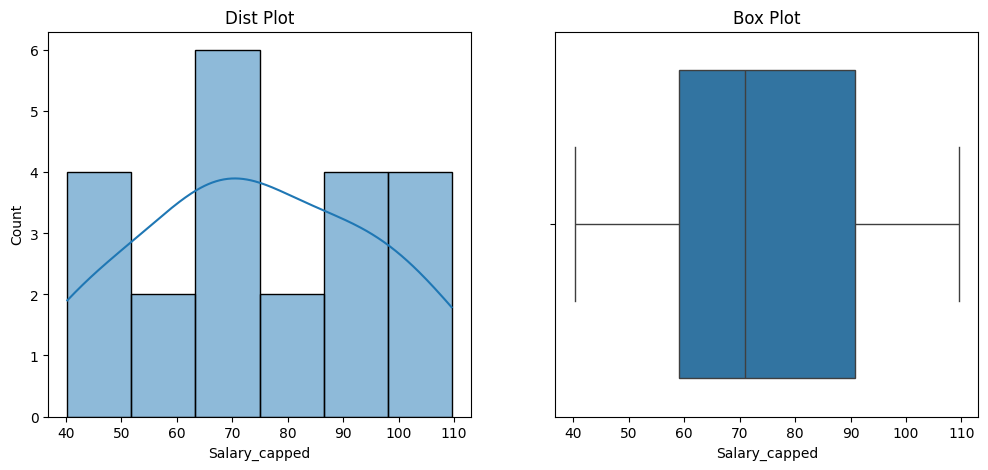

In [ ]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Salary_capped'], kde = True)
plt.title('Dist Plot')

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'Salary_capped')
plt.title('Box Plot')
plt.show()